Los integrantes del Grupo son:

#Lucas Monzon Languasco
#Marcos Dominguez
#Felipe Sarche

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

1) ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [2]:
# Lee el archivo CSV
df = pd.read_csv('spambase.csv')
resultado = []
spam = ['NO SPAM', 'SPAM']
for choise in [0,1]:

    spam_df = df[df['spam'] == choise]

    word_freq_columns = [col for col in spam_df.columns if col.startswith('word_freq_')]

    suma_columnas = spam_df[word_freq_columns].sum()

    top_10 = suma_columnas.sort_values(ascending=False).head(10)

    resultado.append(top_10.to_dict())

    print('\n',spam[choise])
    for columna, valor in resultado[choise].items():
        print(f"{columna[10:]} : {valor}")

print("\n")
claves_iguales = set(resultado[0].keys()).intersection(set(resultado[1].keys()))
for key in claves_iguales:
    print(f"La palabra '{key[10:]}' se repite en ambos grupos de correo")



 NO SPAM
you : 3541702
george : 3527559
hp : 2496576
will : 1495268
your : 1223098
hpl : 1204398
re : 1159138
edu : 800669
address : 681569
meeting : 604460

 SPAM
you : 4105599
your : 2502597
will : 997100
free : 939790
our : 931799
all : 732080
mail : 635470
email : 578759
business : 521250
remove : 499309


La palabra 'will' se repite en ambos grupos de correo
La palabra 'your' se repite en ambos grupos de correo
La palabra 'you' se repite en ambos grupos de correo


2) Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [3]:
# Obtenemos los atributos y target
X = (df.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = df["spam"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)


3) Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [4]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, classification_report

naives_bayes_spam = ComplementNB()
naives_bayes_spam.fit(X_train, y_train)

y_pred_bayes = naives_bayes_spam.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bayes)

print(f"Precisión del modelo: {accuracy:.2f}")

# Generar un reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_bayes))

Precisión del modelo: 0.88
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       810
           1       0.80      0.95      0.87       571

    accuracy                           0.88      1381
   macro avg       0.88      0.89      0.88      1381
weighted avg       0.89      0.88      0.88      1381



4) Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

logistic_regression_spam = LogisticRegression(random_state = 0, class_weight="balanced")
logistic_regression_spam.fit(X_train_scaled, y_train)

y_pred = logistic_regression_spam.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")

# Generar un reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.82
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       810
           1       0.71      0.97      0.82       571

    accuracy                           0.82      1381
   macro avg       0.84      0.84      0.82      1381
weighted avg       0.86      0.82      0.82      1381



5) Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

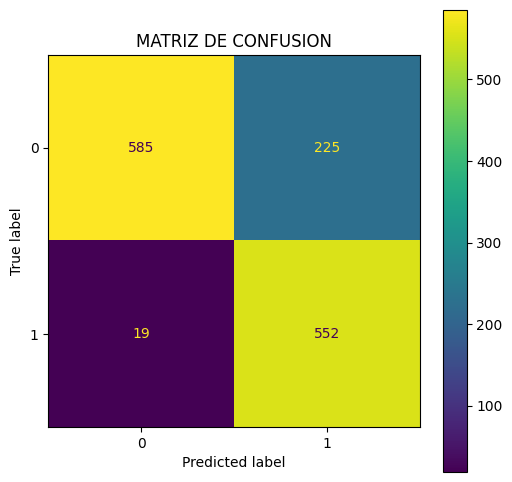

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_regression = logistic_regression_spam.predict(X_test)

cm_bayesd = confusion_matrix(y_test, y_pred_regression)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bayesd,
                              display_labels=logistic_regression_spam.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("MATRIZ DE CONFUSION");

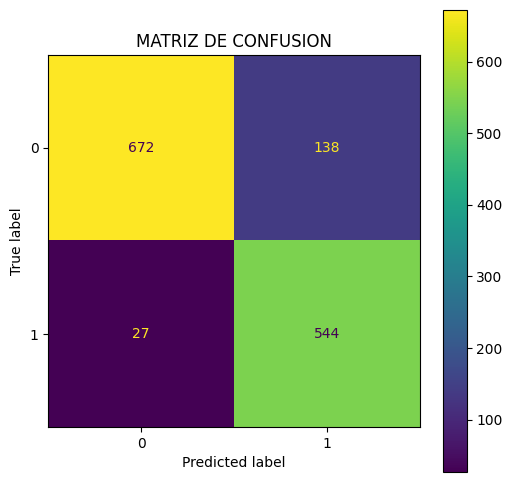

In [7]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bayes,
                              display_labels=naives_bayes_spam.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("MATRIZ DE CONFUSION");


El ambos modelos el error más cometido es el falso positivo, en el modelo naive bayes performa mejor con un 30% menos de falsos positivos.
El error más importante es la detección de SPAM cuando no lo son (falso positivo), por que es más probale que se ignore contenido dentro de la carpeta SPAM a que no sea identificado por el usuario que el correo es SPAM.

6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se 
relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [8]:
print(f"Precision Bayes: {precision_score(y_test, y_pred_bayes, zero_division=0)}")
print(f"Recuperación Bayes: {recall_score(y_test, y_pred_bayes, zero_division=0)}")
print(f"Precision Regression: {precision_score(y_test, y_pred_regression, zero_division=0)}")
print(f"Recuperación Regression: {recall_score(y_test, y_pred_regression, zero_division=0)}")

Precision Bayes: 0.7976539589442815
Recuperación Bayes: 0.9527145359019265
Precision Regression: 0.7104247104247104
Recuperación Regression: 0.9667250437828371


El modelo de Bayes muestra una mayor precisión y una menor recuperación en comparación con el modelo de regresión logística.

La precisión se refiere a la proporción de verdaderos positivos entre todos los casos clasificados como positivos por el modelo. Una menor precisión indica un mayor número de falsos positivos, lo que concuerda con lo observado en las matrices de confusión, donde el modelo de regresión logística presenta una mayor cantidad de falsos positivos.

Por otro lado, la recuperación mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Una menor recuperación sugiere que se han pasado por alto más casos positivos. Este comportamiento es consistente con lo observado en la matriz de confusión, donde el modelo de regresión logística tiene una menor cantidad de falsos negativos.





7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.


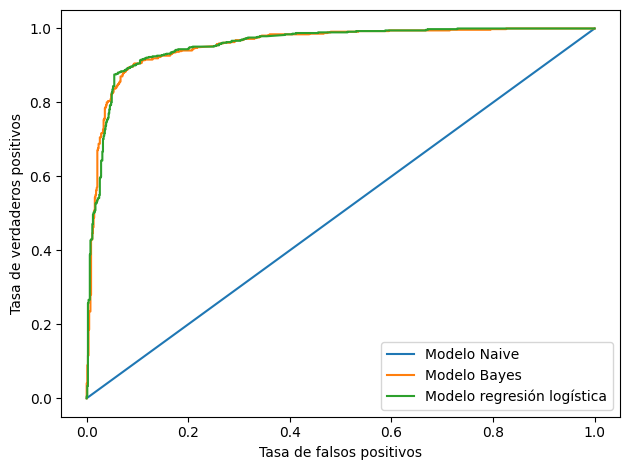

In [14]:
prob_bayes = naives_bayes_spam.predict_proba(X_test_scaled)[:, -1]
prob_regression = logistic_regression_spam.predict_proba(X_test_scaled)[:, -1]
prob_naive = np.zeros_like(prob_regression)

from sklearn.metrics import auc, roc_curve

fpr_naive, tpr_naive, _ = roc_curve(y_test, prob_naive)
fpr_bayes, tpr_bayes, _ = roc_curve(y_test, prob_bayes)
fpr_regression, tpr_regression, _ = roc_curve(y_test, prob_regression)

plt.plot(fpr_naive, tpr_naive, label="Modelo Naive")
plt.plot(fpr_bayes, tpr_bayes, label="Modelo Bayes")
plt.plot(fpr_regression, tpr_regression, label="Modelo regresión logística")
# plt.xlim([-0.01, .01])
# plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();

In [136]:
print("AUC")
print(f"Modelo Naive AUC: {auc(fpr_naive, tpr_naive)}")
print(f"Modelo bayes AUC: {auc(fpr_bayes, tpr_bayes)}")
print(f"Modelo regresión logística AUC: {auc(fpr_regression, tpr_regression)}")

AUC
Modelo Naive AUC: 0.5
Modelo bayes AUC: 0.8648528673952404
Modelo regresión logística AUC: 0.8379196387670964
